In [1]:
from utils import load_data, persistance_1D_with_loops, plot_loops
import gudhi

In [2]:
gdf = load_data('107-tulare')
# gdf = load_data('025-imperial')
gdf.head()

,geometry,centroid,abs_clinton,abs_trump,per_clinton,per_trump
pct16,,,,,,
107-504802,"MULTIPOLYGON (((-119.05812 36.05852, -119.0581...",POINT (-119.06309 36.06087),70.0,110.0,0.388889,0.611111
107-102802,"POLYGON ((-119.13270 36.29711, -119.13229 36.2...",POINT (-119.13494 36.29483),56.0,159.0,0.260465,0.739535
107-499822,"MULTIPOLYGON (((-118.96650 36.56958, -118.9667...",POINT (-118.76676 36.64774),112.0,260.0,0.301075,0.698925
107-299748,"POLYGON ((-119.27390 35.89167, -119.27343 35.8...",POINT (-119.27041 35.88378),573.0,76.0,0.882897,0.117103
107-199811,"POLYGON ((-119.11627 36.12737, -119.11625 36.1...",POINT (-119.16642 36.12486),19.0,61.0,0.237500,0.762500


In [3]:
trump_gdf = gdf[gdf['abs_trump'] > gdf['abs_clinton']]
points = [[x, y] for x, y in zip(trump_gdf['centroid'].values.x, trump_gdf['centroid'].values.y)]

Assumption 1: No 2 homology classes have the same birth time
	satisified: True

Assumption 2: No 2 edges have the same length.
	satisified: True

1


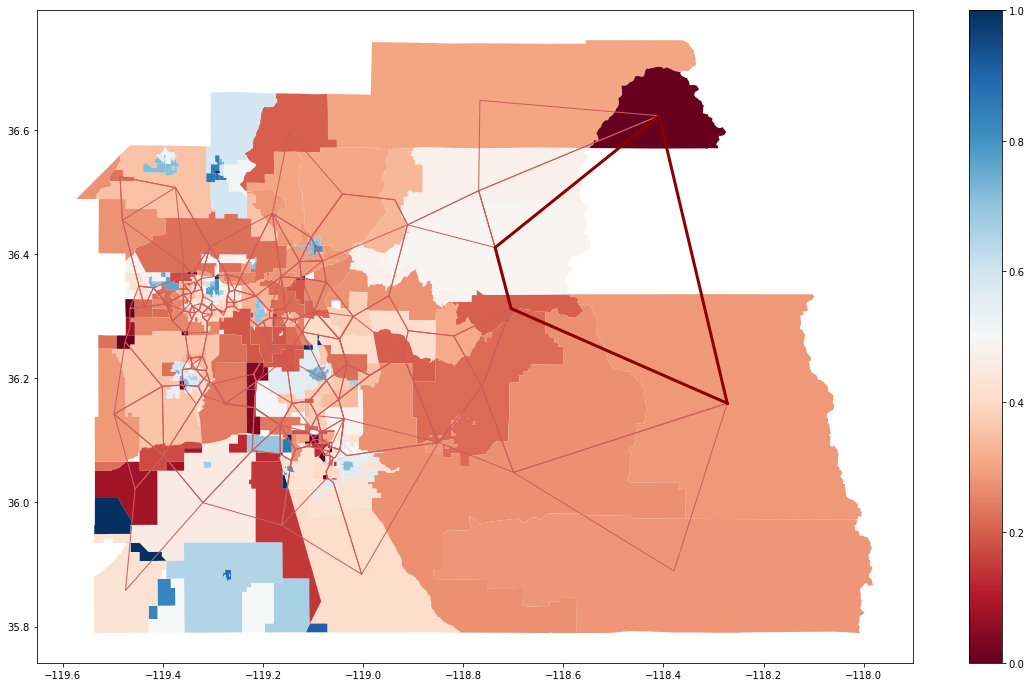

In [4]:
alpha_complex = gudhi.AlphaComplex(points)
simplex_tree = alpha_complex.create_simplex_tree()

persistance = persistance_1D_with_loops(simplex_tree)
plot_loops(gdf, points, persistance)